# **Importar Datos**

In [0]:
import pandas as pd
import numpy as np

In [0]:
df_lineo=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRDzLf36WF7fwhkzQMEH1HE9OMHhJuwR6wXuQCkPJygaadlqdt4ZK582BG_762JrwxwmI7nIuvpW0oC/pub?gid=410360197&single=true&output=csv')  
df_Mercado_libre =pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTwWbw5PBrxm6dUTEmRW6aQGf9gc_TgEt2ziDnHNzjKqGg2AlXDWFDnBxSB1GmsVPdqjU33JuS0j9W0/pub?gid=844185965&single=true&output=csv')  
df_alkosto =pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQxKsBzwrifVJdR_9cdjhVbSExhhFvfIzpmntNxNI7DMapYxw5QbcuF_thRP1-9MMvzVddEePAXK5TN/pub?gid=155685023&single=true&output=csv')  

**Asignar df a analizar**

In [3]:
df_diff = df_lineo.copy()
df_diff.head(5)

,title,brank,price,color,opinions,average_opinions,raw_description,seller,url
0,2 Vidrios Templados Iphone Xr 5d Curvo Cubre H...,Generico,\n $24.000\n,Vidrio,2 reseñas,5.0,2 Vidrios Templados para iphone Xr 5D 0.33 mm ...,\n kingcases\n,https://www.linio.com.co/p/2-vidrios-templados...
1,Celular Samsung Galaxy S20 128GB - Azul,Samsung,\n $3.379.000\n,"3 meses de garantía por defectos de fabrica, n...",NaN,NaN,SAMSUNG GALAXY S20 - AzulLlego el nuevo integ...,NaN,https://www.linio.com.co/p/celular-samsung-gal...
2,Celular Samsung Galaxy M31 128GB,Samsung,\n $1.199.900\n,Nuevo,NaN,NaN,@import url('https://www.falabella.com.co/stat...,NaN,https://www.linio.com.co/p/celular-samsung-gal...
3,Cable lightning Datos Iphone Original 1mts,Apple,\n $59.000\n,Blanco,2 reseñas,5.0,Cable de datos Largo x 1 mtEste cable USB 2.0 ...,\n Digimovil 5G\n,https://www.linio.com.co/p/cable-lightning-dat...
4,Control Gamepad Bluetooth Ipega 9021 Windows A...,SIPEGA,\n $57.900\n,Negro,5 reseñas,4.0,El íPega PG-9021 Control de Juegos para Smartp...,\n GALLEGO VILLANUEVA LUZ ANDREA\n ...,https://www.linio.com.co/p/control-gamepad-blu...


# **Importando Colores de Wikipedia**

In [0]:
import requests
from bs4 import BeautifulSoup

def get_query(url:str, selector:str):
  data = []
  try:   
    response = requests.get(url)
    response.raise_for_status()

    if response: 
        soup = BeautifulSoup(response.text, "html.parser")
        return soup.select(selector)
    return []
  except:
    return []

def getColors(resuts_colors):
    colors = []
    for c in resuts_colors:
      color = c['title']
      if color.find(':') < 0:
        color = color.replace(' (color)','').lower().rstrip()
        colors.append(color)
    return list(set(colors))

def _valid_color(colors:str, color: str)-> bool :
  if string_colors.find(color.strip().lower()) < 0:
    return False
  return True

url_colors = 'https://es.wikipedia.org/wiki/Anexo:Colores_por_orden_alfab%C3%A9tico'
selector = "#mw-content-text > div > p > a[title]"

colors = get_query(url_colors, selector)
colors = getColors(colors)
colors.sort()
string_colors = ",".join(colors)

# Validar y remplazar colores desconocidos **Dataframe**

In [5]:
df_temp = df_diff.loc[:,['color']]

mask=[]
for c in df_temp['color']:
  if _valid_color(str(string_colors), str(c)) and len(c) <= 15:
    mask.append(False)
  else:
    mask.append(True)  

df_temp[mask] = np.NaN
df_diff['color'] = df_temp
df_diff[23:27]


,title,brank,price,color,opinions,average_opinions,raw_description,seller,url
23,Huawei Y9s Midnight Black + Freelace de regalo,Huawei,\n $1.149.900\n,Negro,1 reseña,5.0,Pantalla HUAWEIUltra FullViewLa extraordinaria...,\n SHOP NEXT S.A.S\n,https://www.linio.com.co/p/huawei-y9s-midnight...
24,Xiaomi Combo Audífonos(Haylou GT1) +Mi Band 4+...,Xiaomi,\n $196.900\n,NaN,1 reseña,5.0,Xiaomi Haylou GT1 TWS Bluetooth 5.0 Headphones...,\n water\n,https://www.linio.com.co/p/xiaomi-combo-audi-f...
25,Huawei Selfie Stick retráctil inalámbrico Blue...,Huawei,\n $76.900\n,Negro,NaN,NaN,1. Diseño integrado trípode + disparador autom...,\n Sunsky\n,https://www.linio.com.co/p/huawei-selfie-stick...
26,Smartwatch Amazfit Gtr 47 mm Acero inoxidable,Xiaomi,\n $599.900\n,NaN,NaN,NaN,Elegante diseño de cerámica y metal - Pantalla...,\n Shopings.co\n,https://www.linio.com.co/p/smartwatch-amazfit-...


# Validar y remplazar **opiniones**

**Validando captura de datos**

In [6]:
import re

def get_nums(e:str):
  result = re.findall(r'[\d]+\s', e)
  if result:
    return int(result[0])
  return np.NaN

missing_opinions_mask = df_diff['opinions'].notna()

missing_opinions= (
  df_diff[missing_opinions_mask]['opinions']
  .str.extract(r'(?P<missing_opinions>[\d]+)\s')
)

df_diff.loc[missing_opinions_mask, 'opinions'] = missing_opinions.loc[:, 'missing_opinions']
df_diff.iloc[:10]

,title,brank,price,color,opinions,average_opinions,raw_description,seller,url
0,2 Vidrios Templados Iphone Xr 5d Curvo Cubre H...,Generico,\n $24.000\n,NaN,2,5.0,2 Vidrios Templados para iphone Xr 5D 0.33 mm ...,\n kingcases\n,https://www.linio.com.co/p/2-vidrios-templados...
1,Celular Samsung Galaxy S20 128GB - Azul,Samsung,\n $3.379.000\n,NaN,NaN,NaN,SAMSUNG GALAXY S20 - AzulLlego el nuevo integ...,NaN,https://www.linio.com.co/p/celular-samsung-gal...
2,Celular Samsung Galaxy M31 128GB,Samsung,\n $1.199.900\n,NaN,NaN,NaN,@import url('https://www.falabella.com.co/stat...,NaN,https://www.linio.com.co/p/celular-samsung-gal...
3,Cable lightning Datos Iphone Original 1mts,Apple,\n $59.000\n,Blanco,2,5.0,Cable de datos Largo x 1 mtEste cable USB 2.0 ...,\n Digimovil 5G\n,https://www.linio.com.co/p/cable-lightning-dat...
4,Control Gamepad Bluetooth Ipega 9021 Windows A...,SIPEGA,\n $57.900\n,Negro,5,4.0,El íPega PG-9021 Control de Juegos para Smartp...,\n GALLEGO VILLANUEVA LUZ ANDREA\n ...,https://www.linio.com.co/p/control-gamepad-blu...
5,Pulsera Inteligente Smart Brand M3 Negra con R...,Generico,\n $34.900\n,NaN,NaN,4.0,M3 pulsera inteligente 2019 obsequio manilla d...,\n Dontecnologia\n,https://www.linio.com.co/p/pulsera-inteligente...
6,Kids Case Estuche Funda Protector IBuy para Ip...,Teyac,\n $30.000\n,NaN,2,5.0,KIDS CASE iBuy PARA IPAD MINI 1/2/3TEYAC tra...,\n TECNOLOGIA Y ACCESORIOS\n,https://www.linio.com.co/p/kids-case-estuche-f...
7,Huawei P30 Lite New Edition 256GB 6GB Blanco P...,Huawei,\n $1.368.900\n,BLANCO,NaN,NaN,HUAWEI P30 LITE NEW EDITION 256 GB 6 RAM\nZoom...,\n TECHNOLOGYEXPRESSMS\n,https://www.linio.com.co/p/huawei-p30-lite-new...
8,Smart Band Huawei Band 4 Versión Global original,Huawei,\n $120.000\n,Negro,2,5.0,Smart Band Huawei Band 4 Versión Global origi...,\n Monica Gonzalez\n,https://www.linio.com.co/p/smart-band-huawei-b...
9,Huawei P30 Lite 256GB,Huawei,\n $1.259.900\n,NaN,1,5.0,Garantía del proveedor 1 año.Información ad...,NaN,https://www.linio.com.co/p/huawei-p30-lite-256...


In [5]:
float('89360')

89360.0

# Validar Seller

In [7]:
missing_seller_mask = df_diff['seller'].notna()

missing_seller = temp=(df_diff[missing_seller_mask]['seller']
        .apply(lambda seller: list(seller))
        .apply(lambda letters: list(map(lambda letter: letter.replace('\n', ' '), letters)))
        .apply(lambda letters: ''.join(letters))
        .apply(lambda word: word.strip())
)

df_diff.loc[missing_seller_mask, 'seller'] = missing_seller
df_diff

,title,brank,price,color,opinions,average_opinions,raw_description,seller,url
0,2 Vidrios Templados Iphone Xr 5d Curvo Cubre H...,Generico,\n $24.000\n,NaN,2,5.0,2 Vidrios Templados para iphone Xr 5D 0.33 mm ...,kingcases,https://www.linio.com.co/p/2-vidrios-templados...
1,Celular Samsung Galaxy S20 128GB - Azul,Samsung,\n $3.379.000\n,NaN,NaN,NaN,SAMSUNG GALAXY S20 - AzulLlego el nuevo integ...,NaN,https://www.linio.com.co/p/celular-samsung-gal...
2,Celular Samsung Galaxy M31 128GB,Samsung,\n $1.199.900\n,NaN,NaN,NaN,@import url('https://www.falabella.com.co/stat...,NaN,https://www.linio.com.co/p/celular-samsung-gal...
3,Cable lightning Datos Iphone Original 1mts,Apple,\n $59.000\n,Blanco,2,5.0,Cable de datos Largo x 1 mtEste cable USB 2.0 ...,Digimovil 5G,https://www.linio.com.co/p/cable-lightning-dat...
4,Control Gamepad Bluetooth Ipega 9021 Windows A...,SIPEGA,\n $57.900\n,Negro,5,4.0,El íPega PG-9021 Control de Juegos para Smartp...,GALLEGO VILLANUEVA LUZ ANDREA,https://www.linio.com.co/p/control-gamepad-blu...
...,...,...,...,...,...,...,...,...,...
1960,Universal Multi-dirección Piso Soporte Tableta...,Generico,$98.90,NaN,NaN,NaN,1. Compatible universalmente con todos los dem...,Sunsky,https://www.linio.com.co/p/universal-multi-dir...
1961,Lector De Códigos De Barras Láser SAT LD101 Negro,Sat,$119.70,Negro,4,5.0,Lector De Códigos De Barras Láser SAT LD101 Ne...,TIENDA NEORTE,https://www.linio.com.co/p/lector-de-co-digos-...
1962,InPods 12 Auriculares inalámbricos Bluetooth 5...,OEM,$70.90,Negro,3,5.0,"Caracteristicas1. Bluetooth v5.0, distancia de...",Kaneed,https://www.linio.com.co/p/inpods-12-auricular...
1963,Cámara de computadora HD de Webams con micrófono,Generico,$76.70,Rojo,2,5.0,Descripción: Tipo de ítem: Cámara Balance de...,Luckygreen,https://www.linio.com.co/p/ca-mara-de-computad...


# Validar price

In [8]:
missing_price_mask = df_diff['price'].notna()

missing_price =(df_diff[missing_price_mask]['price']
        .apply(lambda seller: list(seller))
        .apply(lambda letters: list(map(lambda letter: letter.replace('n', ''), letters)))
        .apply(lambda letters: list(map(lambda letter: letter.replace('$', ' '), letters)))
        .apply(lambda letters: list(map(lambda letter: letter.replace('.', ''), letters)))
        .apply(lambda letters: list(map(lambda letter: letter.replace('\\', ''), letters)))
        .apply(lambda letters: ''.join(letters))
        .apply(lambda word: int(word.strip()))
)

df_diff.loc[missing_price_mask, 'price'] = missing_price
df_diff



,title,brank,price,color,opinions,average_opinions,raw_description,seller,url
0,2 Vidrios Templados Iphone Xr 5d Curvo Cubre H...,Generico,24000,NaN,2,5.0,2 Vidrios Templados para iphone Xr 5D 0.33 mm ...,kingcases,https://www.linio.com.co/p/2-vidrios-templados...
1,Celular Samsung Galaxy S20 128GB - Azul,Samsung,3379000,NaN,NaN,NaN,SAMSUNG GALAXY S20 - AzulLlego el nuevo integ...,NaN,https://www.linio.com.co/p/celular-samsung-gal...
2,Celular Samsung Galaxy M31 128GB,Samsung,1199900,NaN,NaN,NaN,@import url('https://www.falabella.com.co/stat...,NaN,https://www.linio.com.co/p/celular-samsung-gal...
3,Cable lightning Datos Iphone Original 1mts,Apple,59000,Blanco,2,5.0,Cable de datos Largo x 1 mtEste cable USB 2.0 ...,Digimovil 5G,https://www.linio.com.co/p/cable-lightning-dat...
4,Control Gamepad Bluetooth Ipega 9021 Windows A...,SIPEGA,57900,Negro,5,4.0,El íPega PG-9021 Control de Juegos para Smartp...,GALLEGO VILLANUEVA LUZ ANDREA,https://www.linio.com.co/p/control-gamepad-blu...
...,...,...,...,...,...,...,...,...,...
1960,Universal Multi-dirección Piso Soporte Tableta...,Generico,9890,NaN,NaN,NaN,1. Compatible universalmente con todos los dem...,Sunsky,https://www.linio.com.co/p/universal-multi-dir...
1961,Lector De Códigos De Barras Láser SAT LD101 Negro,Sat,11970,Negro,4,5.0,Lector De Códigos De Barras Láser SAT LD101 Ne...,TIENDA NEORTE,https://www.linio.com.co/p/lector-de-co-digos-...
1962,InPods 12 Auriculares inalámbricos Bluetooth 5...,OEM,7090,Negro,3,5.0,"Caracteristicas1. Bluetooth v5.0, distancia de...",Kaneed,https://www.linio.com.co/p/inpods-12-auricular...
1963,Cámara de computadora HD de Webams con micrófono,Generico,7670,Rojo,2,5.0,Descripción: Tipo de ítem: Cámara Balance de...,Luckygreen,https://www.linio.com.co/p/ca-mara-de-computad...


# **Validando dataframe**

In [9]:
#contar en numero de filas de la columna marca
row_count_branks = df_diff['brank'].count()

#contar el numero de datos por columna y crear nuevo dataframe
df_count_data = pd.DataFrame(df_diff.count(axis=0) , columns=['amount_data'])

#Validar porcentaje de datos
percentage_serie =[round(item/row_count_branks*100,2) for item in df_count_data['amount_data']]
percentage_error = list(pd.Series([100]* len(df_count_data.index)) - pd.Series(percentage_serie))

#agregar columnas al dataset
df_count_data['percentage'] = percentage_serie
df_count_data['percentage_error'] = percentage_error

#Ordenar por porcentaje de error
df_count_data.sort_values(by='percentage_error',ascending=False)


,amount_data,percentage,percentage_error
color,694,35.32,64.68
opinions,1028,52.32,47.68
average_opinions,1277,64.99,35.01
seller,1676,85.29,14.71
price,1958,99.64,0.36
raw_description,1963,99.90,0.10
title,1965,100.00,0.00
brank,1965,100.00,0.00
url,1965,100.00,0.00


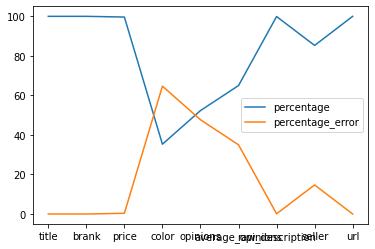

In [10]:
#Graficar analisis
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

df_count_data[['percentage','percentage_error']].plot()

Colormaps: ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag'

,title,brank,price,color,opinions,average_opinions,raw_description,seller,url
0,2 Vidrios Templados Iphone Xr 5d Curvo Cubre H...,Generico,24000,NaN,2,5.0,2 Vidrios Templados para iphone Xr 5D 0.33 mm ...,kingcases,https://www.linio.com.co/p/2-vidrios-templados...
1,Celular Samsung Galaxy S20 128GB - Azul,Samsung,3379000,NaN,NaN,NaN,SAMSUNG GALAXY S20 - AzulLlego el nuevo integ...,NaN,https://www.linio.com.co/p/celular-samsung-gal...
2,Celular Samsung Galaxy M31 128GB,Samsung,1199900,NaN,NaN,NaN,@import url('https://www.falabella.com.co/stat...,NaN,https://www.linio.com.co/p/celular-samsung-gal...
3,Cable lightning Datos Iphone Original 1mts,Apple,59000,Blanco,2,5.0,Cable de datos Largo x 1 mtEste cable USB 2.0 ...,Digimovil 5G,https://www.linio.com.co/p/cable-lightning-dat...
4,Control Gamepad Bluetooth Ipega 9021 Windows A...,SIPEGA,57900,Negro,5,4.0,El íPega PG-9021 Control de Juegos para Smartp...,GALLEGO VILLANUEVA LUZ ANDREA,https://www.linio.com.co/p/control-gamepad-blu...
...,...,...,...,...,...,...,...,...,...
1960,Universal Multi-dirección Piso Soporte Tableta...,Generico,9890,NaN,NaN,NaN,1. Compatible universalmente con todos los dem...,Sunsky,https://www.linio.com.co/p/universal-multi-dir...
1961,Lector De Códigos De Barras Láser SAT LD101 Negro,Sat,11970,Negro,4,5.0,Lector De Códigos De Barras Láser SAT LD101 Ne...,TIENDA NEORTE,https://www.linio.com.co/p/lector-de-co-digos-...
1962,InPods 12 Auriculares inalámbricos Bluetooth 5...,OEM,7090,Negro,3,5.0,"Caracteristicas1. Bluetooth v5.0, distancia de...",Kaneed,https://www.linio.com.co/p/inpods-12-auricular...
1963,Cámara de computadora HD de Webams con micrófono,Generico,7670,Rojo,2,5.0,Descripción: Tipo de ítem: Cámara Balance de...,Luckygreen,https://www.linio.com.co/p/ca-mara-de-computad...


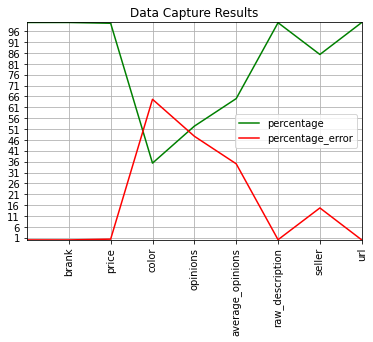

In [16]:

cmap = ListedColormap([ "green", "red"])
linestyles = ['-', '-', '--', '-.', ':']
plot=df_count_data[['percentage','percentage_error']].plot(
    grid=True,
    title='Data Capture Results',
    use_index=True, 
    style=linestyles,
    xticks= np.arange(start=1, stop=10, step=1),
    yticks= np.arange(start=1, stop=100, step=5),
    xlim=[0,8],
    ylim=[0,100],
    rot=90,
    fontsize= 10,
    colormap=cmap
)
print('Colormaps: {}'.format(plt.colormaps()))
df_diff

En la grafica se evidencia: que , seguido del  y por ultimo el dato del vendedor(15 %), Llos demas se capturaron en la mayoria de los casos.

1. el dato con mas errores en la captura fue el color  
2. seguido de opiniones (Aprox. 50% de los datos no se capturo)
2. promedio de las opiniones (35%) no se capturo
3. Aprox. 15% informacion del vendedor no se capturo




# Analisis Color

In [12]:
#optener columnas con error superior al 10%
mask = df_count_data[df_count_data['percentage_error'] > 10].index

#agregar url
mask = list(mask)
mask.append('url')

#filtar NaN
t=df_diff[mask].isna()
mask_nan_color =df_diff['color'].isna()
list(df_diff[mask_nan_color]['url'])[:10]

['https://www.linio.com.co/p/2-vidrios-templados-iphone-xr-5d-curvo-cubre-hasta-el-borde-oqtvd4?qid=2f940cf64a59fe8434ae8f211e35ee39&oid=GE063EL1219VQLCO&position=879&sku=GE063EL1219VQLCO',
 'https://www.linio.com.co/p/celular-samsung-galaxy-s20-128gb-azul-n2lrpy',
 'https://www.linio.com.co/p/celular-samsung-galaxy-m31-128gb-lhdznb?qid=23a791e8d76babcfdf8f977cd71e4e1d&oid=SA015EL1C8Z91LCO&position=48&sku=SA015EL1C8Z91LCO',
 'https://www.linio.com.co/p/pulsera-inteligente-smart-brand-m3-negra-con-repuesto-qeb9og?qid=110c121a599ef4c735b5e13a54eb8543&oid=DO998EL0VUJIWLCO&position=450&sku=DO998EL0VUJIWLCO',
 'https://www.linio.com.co/p/kids-case-estuche-funda-protector-ibuy-para-ipad-mini-1-2-3-fucsia-n44rnx',
 'https://www.linio.com.co/p/huawei-p30-lite-256gb-ld9is7?qid=1173f1f8b18fab4b718d00155249b617&oid=HU072EL1G1L2ELCO&position=511&sku=HU072EL1G1L2ELCO',
 'https://www.linio.com.co/p/reloj-inteligente-amazfit-bip-lite-by-xioami-qdkavo?qid=41147fffc09b15ef24cb5fb44b6198ad&oid=AM601EL0X

Al validar los enlaces se evidencia que este dato no siempre viene en los articulos, la pagina no nos ofrece una estructura estable para optener esta información directamentamente, se debe buscar una nueva estrategia para la captura de este dato.

In [13]:
#filtar NaN
mask_nan_comments =df_diff['opinions'].isna()
list(df_diff[mask_nan_comments]['url'])[10:110]

['https://www.linio.com.co/p/iphone-xr-64gb-negro-qerhpo?qid=88a2b9d792cd22097369e8e27eec1e21&oid=AP039EL0VR0AXLCO&position=178&sku=AP039EL0VR0AXLCO',
 'https://www.linio.com.co/p/huawei-selfie-stick-retra-ctil-inala-mbrico-bluetooth-de-una-pieza-qaqmj0?qid=6f05ae9e8a5f2f8d80cd5c4d1d839fce&oid=HU072EL0Z70VCLCO&position=675&sku=HU072EL0Z70VCLCO',
 'https://www.linio.com.co/p/smartwatch-amazfit-gtr-47-mm-acero-inoxidable-n2ij3s?qid=5d3ec920f4fc5af58117626510424b24&oid=XI310EL18Z71TLCO&position=959&sku=XI310EL18Z71TLCO',
 'https://www.linio.com.co/p/huawei-matepad-pro-teclado-esfero-elec-router-lfk4h2',
 'https://www.linio.com.co/p/xiaomi-mi-band-4-original-2019-negro-jtxtfk?qid=b50395eddc12b2a4631b33b448ae5201&oid=6C5MW97W6E2Z6934177710377&position=725&sku=XI310EL1HMENSLCO',
 'https://www.linio.com.co/p/samsung-galaxy-watch-active-2-44mm-qe73wx',
 'https://www.linio.com.co/p/micro-fono-de-solapa-con-condensador-yc-vm20-para-tel-pc-y-camara-rzxt7u',
 'https://www.linio.com.co/p/cargador-i

Se evidencia que los articulos no cuantan con opiniones, pero se evidencia accesorios y otros tipos de articulos que no corresponden con celulares, se corrige el enlace principal con ayuda de filtros de pagina


In [14]:
mask_nan_comments =df_diff['average_opinions'].isna()
list(df_diff[mask_nan_comments]['url'])[10:110]

['https://www.linio.com.co/p/smartwatch-amazfit-gtr-47-mm-acero-inoxidable-n2ij3s?qid=5d3ec920f4fc5af58117626510424b24&oid=XI310EL18Z71TLCO&position=959&sku=XI310EL18Z71TLCO',
 'https://www.linio.com.co/p/huawei-matepad-pro-teclado-esfero-elec-router-lfk4h2',
 'https://www.linio.com.co/p/samsung-galaxy-watch-active-2-44mm-qe73wx',
 'https://www.linio.com.co/p/micro-fono-de-solapa-con-condensador-yc-vm20-para-tel-pc-y-camara-rzxt7u',
 'https://www.linio.com.co/p/cargador-inala-mbrico-blanco-carga-ra-pida-3-en-1-para-iphone-lg7xrl?qid=2f940cf64a59fe8434ae8f211e35ee39&oid=GE063EL1DE9FILCO&position=867&sku=GE063EL1DE9FILCO',
 'https://www.linio.com.co/p/protector-vidrio-ceramico-iphone-11-ymqvwz?qid=5d3ec920f4fc5af58117626510424b24&oid=GE063EL038P2MLCO&position=911&sku=GE063EL038P2MLCO',
 'https://www.linio.com.co/p/reloj-huawei-watch-gt2-46mm-naranja-yp4d27?qid=5c517df6c7408587f2bb9f9eb0de4368&oid=HU072EL00ZP6ELCO&position=113&sku=HU072EL00ZP6ELCO',
 'https://www.linio.com.co/p/tablet-len

In [15]:
mask_nan_comments =df_diff['seller'].isna()
list(df_diff[mask_nan_comments]['url'])[10:110]

['https://www.linio.com.co/p/samsung-galaxy-s20-plus-128gb-gris-x10fvc',
 'https://www.linio.com.co/p/celular-samsung-a71-128-gb-n07fo7?qid=88a2b9d792cd22097369e8e27eec1e21&oid=SA015EL1AOOMELCO&position=148&sku=SA015EL1AOOMELCO',
 'https://www.linio.com.co/p/celular-infinix-note-4-pro-x571-32gb-oro-lc92as',
 'https://www.linio.com.co/p/cargador-inala-mbrico-samsung-stand-15w-n1d2v2',
 'https://www.linio.com.co/p/celular-l503f-dorado-hyundai-qetp9r',
 'https://www.linio.com.co/p/iphone-7-32gb-s00cbz',
 'https://www.linio.com.co/p/celular-xiaomi-redmi-note-8-pro-128gb-6gb-ram-negro-ldaz8c?qid=23a791e8d76babcfdf8f977cd71e4e1d&oid=XI310EL1G8I20LCO&position=28&sku=XI310EL1G8I20LCO',
 'https://www.linio.com.co/p/samsung-galaxy-s20-plus-128gb-gris-x10fvc?qid=88a2b9d792cd22097369e8e27eec1e21&oid=SA015EL076J0ILCO&position=159&sku=SA015EL076J0ILCO',
 'https://www.linio.com.co/p/apple-iphone-11-128-gb-color-verde-tper8h?qid=5c517df6c7408587f2bb9f9eb0de4368&oid=AP039EL0JPW04LCO&position=116&sku=AP

Se evidencia que los productos no cuentan con informacion del vendedor. pero algunos estan comentados, se aprueba este feature el cual nos puede dar informacion relevante acerca de este tipo de vendedores